# Proyecto Properatio: Análisis exploratorio y Preparación de datos



Preparación de datos para entrenar un modelo de predicción del valor de las propiedades en Argentina.<br>

Creado por: Adriana Villalobos

## 1. Importación de librerías y Carga del dataset

In [69]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status
import numpy as np

In [70]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "entrenamiento.csv"

# Load the latest version
df_raw = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "alejandroczernikier/properati-argentina-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


In [71]:
df_raw.head(1)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0


### Inspección inicial

In [72]:
pd.set_option('display.max_columns', None)

In [73]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [74]:
df_raw.shape

(992192, 25)

In [75]:
status(df_raw)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


In [76]:
# busco duplicados, imprimo el total y los elimino
print(f"Total de duplicados: {df_raw.duplicated().sum()}")
df_raw = df_raw.drop_duplicates()

Total de duplicados: 0


In [77]:
df_raw[['l1', 'l2', 'l3', 'l4','l5']].sample(10)

,l1,l2,l3,l4,l5
320770,Argentina,Capital Federal,Villa Santa Rita,NaN,NaN
527585,Argentina,Santa Fe,Rosario,NaN,NaN
333258,Argentina,Capital Federal,Villa Urquiza,NaN,NaN
20661,Uruguay,Montevideo,NaN,NaN,NaN
433882,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,Lomas de Zamora,NaN
52723,Argentina,Neuquén,Neuquén,NaN,NaN
546705,Argentina,Capital Federal,Parque Patricios,NaN,NaN
292850,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN
987822,Argentina,Misiones,San Antonio,NaN,NaN
876165,Argentina,Bs.As. G.B.A. Zona Sur,Lanús,NaN,NaN


Entendiendo las columnas del l1 al l5: Vemos que es la especificidad del lugar. Aquí vamos a aplicar el primer filtro y quedarnos con una sola localidad de Argentina

In [78]:
df_raw['l2'].value_counts().head(10)

l2
Capital Federal                 249738
Buenos Aires Costa Atlántica    178712
Bs.As. G.B.A. Zona Norte        127510
Bs.As. G.B.A. Zona Sur          112975
Santa Fe                         93111
Bs.As. G.B.A. Zona Oeste         73172
Córdoba                          60877
Buenos Aires Interior            22280
Mendoza                          11558
Neuquén                          10642
Name: count, dtype: int64

Dado que es sabido que Capital Federal tiene el valor por metro cuadrado más alto del país y hay una cantidad de registros mayor, vamos a quedarnos solo con esa localidad para hacer un análisis y predicciones más acotados.

In [79]:
# Crea un nuevo dataframe filtrado por 'Capital Federal'
df = df_raw[df_raw['l2'] == 'Capital Federal'].copy()

In [80]:
# Elimino las columnas que no me aportan valor para el análisis por ser texto libre, identificadores o fechas
cols_to_drop = ['id', 'ad_type', 'end_date', 'created_on',  'title', 'description',
                'l1', 'l2', 'l3', 'l4', 'l5', 'l6']
df.drop(columns=cols_to_drop, inplace=True)
df.head(1)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
0,2019-11-29,-58.442399,-34.573623,3.0,2.0,2.0,NaN,NaN,USD,NaN,Departamento,Venta,259000.0


In [81]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,start_date,0,0.000000,0,0.000000,346,object
1,lat,32155,0.128755,0,0.000000,72664,float64
2,lon,32033,0.128266,0,0.000000,71703,float64
3,rooms,78289,0.313485,0,0.000000,32,float64
4,bedrooms,127386,0.510079,4692,0.018788,65,float64
5,bathrooms,37245,0.149136,0,0.000000,18,float64
6,surface_total,77958,0.312159,15,0.000060,1737,float64
7,surface_covered,84393,0.337926,0,0.000000,1523,float64
8,currency,8291,0.033199,0,0.000000,2,object
9,price_period,149953,0.600441,0,0.000000,3,object


In [82]:
# Inspección de columas de tipo object baja cardinalidad
print(df['price_period'].value_counts())
print('-' * 20)
print(df['currency'].value_counts())
print('-' * 20)
print(df['property_type'].value_counts())
print('-' * 20)
print(df['operation_type'].value_counts())

price_period
Mensual    99782
Semanal        2
Diario         1
Name: count, dtype: int64
--------------------
currency
USD    180898
ARS     60549
Name: count, dtype: int64
--------------------
property_type
Departamento       155287
Otro                29122
PH                  13672
Local comercial     13657
Oficina             13282
Lote                 9997
Casa                 9305
Cochera              3506
Depósito             1902
Casa de campo           8
Name: count, dtype: int64
--------------------
operation_type
Venta                177111
Alquiler              58861
Alquiler temporal     13766
Name: count, dtype: int64


## 2. Preparación de datos

### 2.1 Selección inicial de columnas

Elegimos las categorías Oficina y Local Comercial para darle al proyecto utilidad comercial

In [83]:
df.drop(df[df['property_type'].isin(['Oficina', 'Local Comercial'])].index, inplace=True)
df.drop(columns=['property_type'], inplace=True)

In [84]:
print(df.operation_type.value_counts())
print(df.currency.value_counts())

operation_type
Venta                171688
Alquiler              51043
Alquiler temporal     13725
Name: count, dtype: int64
currency
USD    172922
ARS     55761
Name: count, dtype: int64


### 2.2 Manejo de los valores de precios y diferentes monedas

Para nos descartar los avisos publicados en pesos, los convertimos a dólares usando un dataset de valores históricos de `https://dolarhoy.com/historico-dolar-blue` 

In [85]:
print('Menor Fecha: ', df['start_date'].min())
print('Mayor Fecha: ', df['start_date'].max())

Menor Fecha:  2019-07-04
Mayor Fecha:  2020-07-27


In [86]:
valor_blue = pd.read_csv('../data/dolar_blue_historico_jul19_a_jul20.csv', sep=',', parse_dates=['category'], index_col='category')
# renombrar el indice de category a fecha
valor_blue.rename_axis('Fecha', inplace=True)
valor_blue.head(10)

,valor
Fecha,
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-10,42.80
2019-07-11,43.20
2019-07-12,43.25
2019-07-15,43.75


El dataset de valor_blue no tiene todos los días, posiblemente por feriados y fines de semana, resolveremos ese problema asignando el valor del día anterios a las fechas faltantes.

In [87]:

fechas_completas = pd.date_range(start=valor_blue.index.min(), end=valor_blue.index.max())

# Reindex the dataframe with the complete date range and forward fill the missing values
valor_blue = valor_blue.reindex(fechas_completas).ffill()
valor_blue.head(10)

,valor
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-06,42.90
2019-07-07,42.90
2019-07-08,42.90
2019-07-09,42.90
2019-07-10,42.80


In [88]:
valor_blue.describe()

,valor
count,397.000000
mean,83.462972
std,28.002052
min,42.800000
25%,63.000000
50%,77.750000
75%,117.000000
max,139.000000


In [89]:
df[df['currency'] == 'ARS'].head(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,operation_type,price
5753,2019-07-07,-58.378330,-34.596388,2.0,NaN,2.0,NaN,50.0,ARS,NaN,Alquiler,19000.0
5756,2019-07-07,NaN,NaN,1.0,NaN,1.0,65.0,30.0,ARS,NaN,Alquiler temporal,24500.0
5758,2019-07-07,-58.445597,-34.557254,1.0,NaN,1.0,43.0,40.0,ARS,Mensual,Alquiler,19000.0
5759,2019-07-07,-58.445597,-34.557254,2.0,NaN,1.0,53.0,51.0,ARS,Mensual,Alquiler,28000.0
5762,2019-07-07,-58.397061,-34.602252,1.0,NaN,1.0,36.0,NaN,ARS,Mensual,Alquiler temporal,20500.0


In [90]:
# Elimino los datos sin valor de precio
print('Cantidad de rows: ' + str(df.shape[0]))
df = df[df['price'].notna()]

# Elimino los datos con valor 0 de precio
df = df[df['price'] != 0]
print('Cantidad de rows sin 0 ni nulos: ' + str(df.shape[0]))

Cantidad de rows: 236456
Cantidad de rows sin 0 ni nulos: 228683


In [91]:
df['valor_cambio'] = df['start_date'].map(valor_blue['valor'])

df['price_usd'] = np.where(df['currency'] == 'ARS', df['price'] * df['valor_cambio'], df['price'])

In [92]:
df[df['currency'] == 'ARS'].head(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,operation_type,price,valor_cambio,price_usd
5753,2019-07-07,-58.378330,-34.596388,2.0,NaN,2.0,NaN,50.0,ARS,NaN,Alquiler,19000.0,42.9,815100.0
5756,2019-07-07,NaN,NaN,1.0,NaN,1.0,65.0,30.0,ARS,NaN,Alquiler temporal,24500.0,42.9,1051050.0
5758,2019-07-07,-58.445597,-34.557254,1.0,NaN,1.0,43.0,40.0,ARS,Mensual,Alquiler,19000.0,42.9,815100.0
5759,2019-07-07,-58.445597,-34.557254,2.0,NaN,1.0,53.0,51.0,ARS,Mensual,Alquiler,28000.0,42.9,1201200.0
5762,2019-07-07,-58.397061,-34.602252,1.0,NaN,1.0,36.0,NaN,ARS,Mensual,Alquiler temporal,20500.0,42.9,879450.0


In [93]:
df.sample(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,operation_type,price,valor_cambio,price_usd
742747,2019-11-01,-58.392176,-34.592308,5.0,4.0,3.0,662.0,488.0,USD,Mensual,Alquiler,6000.0,67.50,6000.0
583376,2020-03-10,-58.521789,-34.637877,NaN,NaN,NaN,440.0,440.0,ARS,NaN,Alquiler,120000.0,79.75,9570000.0
890944,2020-03-21,-58.501236,-34.594806,NaN,NaN,1.0,NaN,NaN,USD,NaN,Venta,205000.0,85.50,205000.0
247833,2020-01-03,-58.494750,-34.580450,NaN,NaN,NaN,200.0,196.0,ARS,NaN,Alquiler,45000.0,77.00,3465000.0
122639,2020-01-06,NaN,NaN,1.0,1.0,1.0,NaN,NaN,ARS,NaN,Alquiler,9000.0,77.25,695250.0


Ya no necesitamos las columnas 'price' ni 'currency' ya que tenemos todo llevado a dólares en 'price_usd' y el valor del tipo de cambio

In [94]:
df = df.drop(columns=['price', 'currency'])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228683 entries, 0 to 992191
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       228683 non-null  object 
 1   lat              198331 non-null  float64
 2   lon              198450 non-null  float64
 3   rooms            163161 non-null  float64
 4   bedrooms         117375 non-null  float64
 5   bathrooms        196091 non-null  float64
 6   surface_total    153338 non-null  float64
 7   surface_covered  147638 non-null  float64
 8   price_period     88156 non-null   object 
 9   operation_type   228683 non-null  object 
 10  valor_cambio     228683 non-null  float64
 11  price_usd        228683 non-null  float64
dtypes: float64(9), object(3)
memory usage: 22.7+ MB


Ya que price_period tiene muchos nulos y muchos datos de "Operación" tipo "Venta" con valor "Mensual" que no tiene sentido la eliminamos, y damos por sentado que los alquileres son mensuales

In [96]:
df = df.drop('price_period', axis=1)

In [97]:
df.sample(5)

,start_date,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,operation_type,valor_cambio,price_usd
157747,2019-12-03,-58.398697,-34.585720,3.0,NaN,1.0,111.0,111.0,Venta,68.5,330000.0
659397,2020-04-06,-58.460861,-34.630874,NaN,NaN,NaN,NaN,NaN,Venta,85.0,28000.0
875729,2020-04-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Venta,83.5,73000.0
185133,2020-06-16,-58.486334,-34.567449,2.0,1.0,1.0,NaN,NaN,Alquiler,125.0,2062500.0
572538,2019-08-13,-58.442926,-34.562347,4.0,NaN,3.0,171.0,155.0,Venta,57.0,1090000.0


Ahora nos enfrentamos a propiedades sin latitud, longitud, rooms, bedrooms, bathrooms, surface_total y/o surface_covered, donde desconocemos su ubicación y/o las dimensiones de la propiedad

In [98]:
# Para los datos sin surface_covered tomamos la surface_total y viceversa
df['surface_covered'] = np.where(df['surface_covered'].isna(), df['surface_total'], df['surface_covered'])
df['surface_total'] = np.where(df['surface_total'].isna(), df['surface_covered'], df['surface_total'])

In [99]:
# Para los datos sin rooms tomamos bedrooms
df['rooms'] = np.where(df['rooms'].isna(), df['bedrooms'], df['rooms'])

# Elimino la columna bedrooms porque al tratarse de locales comerciales u oficinas, no aplica
df = df.drop('bedrooms', axis=1)

In [100]:
# Elimino los rows que no tienen ninguno de los siguientes datos:  rooms, bathrooms, surface_total y surface_covered
size_pre = df.shape[0]
print('Tañamo del df antes de eliminar rows con pocos datos: ' + str(size_pre))
df = df.dropna(subset=['rooms', 'bathrooms', 'surface_total', 'surface_covered'], how='all')
size_post = df.shape[0]
print('Tamaño del df despues de eliminar rows con pocos datos: ' + str(size_post))
print('Diferencia: ', size_pre - size_post)


Tañamo del df antes de eliminar rows con pocos datos: 228683
Tamaño del df despues de eliminar rows con pocos datos: 218322
Diferencia:  10361


In [101]:
# Ya no necesitamos la columna valor_cambio ni start_date, así que las eliminamos
df = df.drop(['valor_cambio', 'start_date'], axis=1)

In [102]:
df.sample(5)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,operation_type,price_usd
20532,-58.468341,-34.618488,NaN,NaN,552.0,552.0,Venta,850000.0
357525,-58.448956,-34.547306,4.0,3.0,220.0,286.0,Venta,528000.0
313336,-58.408796,-34.577855,8.0,4.0,304.0,304.0,Venta,1480000.0
76230,NaN,NaN,3.0,2.0,112.0,112.0,Venta,630000.0
541217,-58.379160,-34.592813,4.0,2.0,NaN,NaN,Venta,442000.0


### 2.3 Discretización de variables numéricas

#### Latitud y longitud

In [103]:
df['lat_cat'], bins_lat_cat = pd.qcut(df['lat'], 10, duplicates="drop", retbins=True)
df['lat_cat'].value_counts().sort_index()

lat_cat
(-71.659, -58.489]    19112
(-58.489, -58.467]    19110
(-58.467, -58.453]    19109
(-58.453, -58.442]    19111
(-58.442, -58.434]    19113
(-58.434, -58.424]    19107
(-58.424, -58.414]    19157
(-58.414, -58.402]    19071
(-58.402, -58.386]    19102
(-58.386, -54.1]      19111
Name: count, dtype: int64

In [104]:
df['lon_cat'], bins_lon_cat = pd.qcut(df['lon'], 10, duplicates="drop", retbins=True)
df['lon_cat'].value_counts().sort_index()

lon_cat
(-53.788999999999994, -34.63]    19139
(-34.63, -34.618]                19106
(-34.618, -34.61]                19136
(-34.61, -34.603]                19143
(-34.603, -34.598]               19087
(-34.598, -34.593]               19124
(-34.593, -34.586]               19123
(-34.586, -34.578]               19124
(-34.578, -34.564]               19117
(-34.564, 1.0]                   19123
Name: count, dtype: int64

#### Rooms, bathrooms, surfaces

In [105]:
df.rooms.value_counts().sort_index()

rooms
-2.0          2
-1.0          1
 0.0         10
 1.0      37863
 2.0      50040
 3.0      42870
 4.0      25006
 5.0       7471
 6.0       2497
 7.0       1371
 8.0        511
 9.0        108
 10.0       182
 11.0        56
 12.0        54
 13.0        11
 14.0        13
 15.0        14
 16.0        27
 18.0         8
 20.0        18
 21.0         5
 22.0         5
 24.0         1
 25.0         1
 26.0         5
 27.0         3
 28.0         2
 30.0        25
 31.0         5
 32.0         3
 33.0         4
 36.0         5
 37.0         2
 39.0         1
 40.0        10
 45.0         1
 48.0         1
 55.0         1
 57.0         1
 62.0         6
 70.0         1
 72.0         1
 77.0         3
 100.0        1
 101.0        1
 115.0        1
 128.0        2
 130.0        1
 147.0        1
 153.0        2
 303.0        1
Name: count, dtype: int64

In [106]:
# Los valores negativos de 'rooms', 'bathrooms', 'surface_total' y 'surface_covered' no tienen sentido, los cambio a NaN
df.loc[df['rooms'] < 0, 'rooms'] = np.nan
df.loc[df['bathrooms'] < 0, 'bathrooms'] = np.nan
df.loc[df['surface_total'] < 0, 'surface_total'] = np.nan
df.loc[df['surface_covered'] < 0, 'surface_covered'] = np.nan


In [107]:
df.rooms.value_counts().sort_index()


rooms
0.0         10
1.0      37863
2.0      50040
3.0      42870
4.0      25006
5.0       7471
6.0       2497
7.0       1371
8.0        511
9.0        108
10.0       182
11.0        56
12.0        54
13.0        11
14.0        13
15.0        14
16.0        27
18.0         8
20.0        18
21.0         5
22.0         5
24.0         1
25.0         1
26.0         5
27.0         3
28.0         2
30.0        25
31.0         5
32.0         3
33.0         4
36.0         5
37.0         2
39.0         1
40.0        10
45.0         1
48.0         1
55.0         1
57.0         1
62.0         6
70.0         1
72.0         1
77.0         3
100.0        1
101.0        1
115.0        1
128.0        2
130.0        1
147.0        1
153.0        2
303.0        1
Name: count, dtype: int64

In [108]:
df['rooms_cat'], bins_rooms_cat = pd.qcut(df['rooms'], 6, duplicates="drop", retbins=True)
df['rooms_cat'].value_counts().sort_index()

rooms_cat
(-0.001, 1.0]    37873
(1.0, 2.0]       50040
(2.0, 3.0]       42870
(3.0, 4.0]       25006
(4.0, 303.0]     12443
Name: count, dtype: int64

In [109]:
df.bathrooms.value_counts().sort_index()

bathrooms
1.0     130473
2.0      44342
3.0      13719
4.0       5040
5.0       1815
6.0        423
7.0         96
8.0         74
9.0         25
10.0        33
11.0         7
12.0         7
14.0         3
15.0         4
16.0         6
18.0        18
20.0         6
Name: count, dtype: int64

In [110]:
df['bathrooms_cat'], bins_bathrooms_cat = pd.qcut(df['bathrooms'], 3, duplicates="drop", retbins=True)
df['bathrooms_cat'].value_counts().sort_index()

bathrooms_cat
(0.999, 2.0]    174815
(2.0, 20.0]      21276
Name: count, dtype: int64

In [111]:
df.surface_total.value_counts().sort_index()

surface_total
0.0           14
1.0          133
2.0           15
3.0            7
4.0            5
            ... 
106418.0       1
108960.0       1
120855.0       1
126062.0       1
1000000.0      1
Name: count, Length: 1474, dtype: int64

In [112]:
# Ya que una surface_total y surface_covered de 0 no tiene sentido, las cambio a NaN
df.loc[df['surface_total'] == 0, 'surface_total'] = np.nan
df.loc[df['surface_covered'] == 0, 'surface_covered'] = np.nan

In [113]:
df['surface_total_cat'], bins_surface_total_cat = pd.qcut(df['surface_total'], 5, duplicates="drop", retbins=True)
df['surface_total_cat'].value_counts().sort_index()

surface_total_cat
(0.999, 40.0]         34890
(40.0, 55.0]          31334
(55.0, 80.0]          30897
(80.0, 145.0]         31371
(145.0, 1000000.0]    31786
Name: count, dtype: int64

In [114]:
df.surface_covered.value_counts().sort_index()

surface_covered
1.0          149
2.0           29
3.0           29
4.0           11
5.0           13
            ... 
104890.0       3
106418.0       1
120855.0       1
126062.0       1
1000000.0      1
Name: count, Length: 1403, dtype: int64

In [115]:
df['surface_covered_cat'], bins_surface_covered_cat  = pd.qcut(df['surface_covered'], 5, duplicates="drop", retbins=True)
df['surface_covered_cat'].value_counts().sort_index()

surface_covered_cat
(0.999, 37.0]         32879
(37.0, 50.0]          34514
(50.0, 72.0]          29628
(72.0, 129.0]         31313
(129.0, 1000000.0]    31943
Name: count, dtype: int64

#### Categorías para nulos

In [116]:
df.sample(5)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,operation_type,price_usd,lat_cat,lon_cat,rooms_cat,bathrooms_cat,surface_total_cat,surface_covered_cat
632424,-58.418835,-34.588050,2.0,1.0,NaN,NaN,Venta,85000.0,"(-58.424, -58.414]","(-34.593, -34.586]","(1.0, 2.0]","(0.999, 2.0]",NaN,NaN
879001,-58.442865,-34.560857,4.0,3.0,86.0,76.0,Venta,260000.0,"(-58.453, -58.442]","(-34.564, 1.0]","(3.0, 4.0]","(2.0, 20.0]","(80.0, 145.0]","(72.0, 129.0]"
776992,-58.472272,-34.577643,4.0,3.0,150.0,88.0,Venta,395000.0,"(-58.489, -58.467]","(-34.578, -34.564]","(3.0, 4.0]","(2.0, 20.0]","(145.0, 1000000.0]","(72.0, 129.0]"
589228,-58.458384,-34.555433,5.0,3.0,300.0,280.0,Alquiler,2450.0,"(-58.467, -58.453]","(-34.564, 1.0]","(4.0, 303.0]","(2.0, 20.0]","(145.0, 1000000.0]","(129.0, 1000000.0]"
533758,-58.485680,-34.598682,NaN,1.0,NaN,NaN,Venta,160000.0,"(-58.489, -58.467]","(-34.603, -34.598]",NaN,"(0.999, 2.0]",NaN,NaN


In [117]:
# Agregamos la categoría desconocido a los intervalos que no tienen valor
df["lat_cat"] = df["lat_cat"].cat.add_categories("desconocido")
df["lat_cat"] = df["lat_cat"].fillna("desconocido")

df["lon_cat"] = df["lon_cat"].cat.add_categories("desconocido")
df["lon_cat"] = df["lon_cat"].fillna("desconocido")

df["rooms_cat"] = df["rooms_cat"].cat.add_categories("desconocido")
df["rooms_cat"] = df["rooms_cat"].fillna("desconocido")

df["bathrooms_cat"] = df["bathrooms_cat"].cat.add_categories("desconocido")
df["bathrooms_cat"] = df["bathrooms_cat"].fillna("desconocido")

df["surface_total_cat"] = df["surface_total_cat"].cat.add_categories("desconocido")
df["surface_total_cat"] = df["surface_total_cat"].fillna("desconocido")

df["surface_covered_cat"] = df["surface_covered_cat"].cat.add_categories("desconocido")
df["surface_covered_cat"] = df["surface_covered_cat"].fillna("desconocido")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218322 entries, 0 to 992191
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   lat                  191103 non-null  float64 
 1   lon                  191222 non-null  float64 
 2   rooms                168232 non-null  float64 
 3   bathrooms            196091 non-null  float64 
 4   surface_total        160278 non-null  float64 
 5   surface_covered      160277 non-null  float64 
 6   operation_type       218322 non-null  object  
 7   price_usd            218322 non-null  float64 
 8   lat_cat              218322 non-null  category
 9   lon_cat              218322 non-null  category
 10  rooms_cat            218322 non-null  category
 11  bathrooms_cat        218322 non-null  category
 12  surface_total_cat    218322 non-null  category
 13  surface_covered_cat  218322 non-null  category
dtypes: category(6), float64(7), object(1)
memory usage: 16.2+

#### Eliminación de columnas discretizadas

In [119]:
df = df.drop(columns=['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered'])

In [120]:
freq_tbl(df)

      operation_type  frequency  percentage  cumulative_perc
0              Venta     156484    0.716758         0.716758
1           Alquiler      48742    0.223257         0.940015
2  Alquiler temporal      13096    0.059985         1.000000

----------------------------------------------------------------

               lat_cat  frequency  percentage  cumulative_perc
0          desconocido      27219    0.124674         0.124674
1   (-58.424, -58.414]      19157    0.087747         0.212420
2   (-58.442, -58.434]      19113    0.087545         0.299965
3   (-71.659, -58.489]      19112    0.087540         0.387506
4   (-58.453, -58.442]      19111    0.087536         0.475041
5     (-58.386, -54.1]      19111    0.087536         0.562577
6   (-58.489, -58.467]      19110    0.087531         0.650109
7   (-58.467, -58.453]      19109    0.087527         0.737635
8   (-58.434, -58.424]      19107    0.087518         0.825153
9   (-58.402, -58.386]      19102    0.087495         0.912

In [121]:
from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 377.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.4 Categorización de operation_type

In [122]:
df['operation_type'] = df['operation_type'].astype('category')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218322 entries, 0 to 992191
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   operation_type       218322 non-null  category
 1   price_usd            218322 non-null  float64 
 2   lat_cat              218322 non-null  category
 3   lon_cat              218322 non-null  category
 4   rooms_cat            218322 non-null  category
 5   bathrooms_cat        218322 non-null  category
 6   surface_total_cat    218322 non-null  category
 7   surface_covered_cat  218322 non-null  category
dtypes: category(7), float64(1)
memory usage: 4.8 MB


Ahora estamos listos para hacer One Hot Encoding

### 2.5 One Hot Encoding

In [124]:
df = pd.get_dummies(df, columns=['operation_type', 'lat_cat', 'lon_cat', 'rooms_cat', 'bathrooms_cat', 'surface_total_cat', 'surface_covered_cat'], drop_first=True)

In [125]:
df.head()

,price_usd,operation_type_Alquiler temporal,operation_type_Venta,"lat_cat_(-58.489, -58.467]","lat_cat_(-58.467, -58.453]","lat_cat_(-58.453, -58.442]","lat_cat_(-58.442, -58.434]","lat_cat_(-58.434, -58.424]","lat_cat_(-58.424, -58.414]","lat_cat_(-58.414, -58.402]","lat_cat_(-58.402, -58.386]","lat_cat_(-58.386, -54.1]",lat_cat_desconocido,"lon_cat_(-34.63, -34.618]","lon_cat_(-34.618, -34.61]","lon_cat_(-34.61, -34.603]","lon_cat_(-34.603, -34.598]","lon_cat_(-34.598, -34.593]","lon_cat_(-34.593, -34.586]","lon_cat_(-34.586, -34.578]","lon_cat_(-34.578, -34.564]","lon_cat_(-34.564, 1.0]",lon_cat_desconocido,"rooms_cat_(1.0, 2.0]","rooms_cat_(2.0, 3.0]","rooms_cat_(3.0, 4.0]","rooms_cat_(4.0, 303.0]",rooms_cat_desconocido,"bathrooms_cat_(2.0, 20.0]",bathrooms_cat_desconocido,"surface_total_cat_(40.0, 55.0]","surface_total_cat_(55.0, 80.0]","surface_total_cat_(80.0, 145.0]","surface_total_cat_(145.0, 1000000.0]",surface_total_cat_desconocido,"surface_covered_cat_(37.0, 50.0]","surface_covered_cat_(50.0, 72.0]","surface_covered_cat_(72.0, 129.0]","surface_covered_cat_(129.0, 1000000.0]",surface_covered_cat_desconocido
0,259000.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,235500.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,175000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
3,140000.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,173000.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [126]:
df.columns

Index(['price_usd', 'operation_type_Alquiler temporal', 'operation_type_Venta',
       'lat_cat_(-58.489, -58.467]', 'lat_cat_(-58.467, -58.453]',
       'lat_cat_(-58.453, -58.442]', 'lat_cat_(-58.442, -58.434]',
       'lat_cat_(-58.434, -58.424]', 'lat_cat_(-58.424, -58.414]',
       'lat_cat_(-58.414, -58.402]', 'lat_cat_(-58.402, -58.386]',
       'lat_cat_(-58.386, -54.1]', 'lat_cat_desconocido',
       'lon_cat_(-34.63, -34.618]', 'lon_cat_(-34.618, -34.61]',
       'lon_cat_(-34.61, -34.603]', 'lon_cat_(-34.603, -34.598]',
       'lon_cat_(-34.598, -34.593]', 'lon_cat_(-34.593, -34.586]',
       'lon_cat_(-34.586, -34.578]', 'lon_cat_(-34.578, -34.564]',
       'lon_cat_(-34.564, 1.0]', 'lon_cat_desconocido', 'rooms_cat_(1.0, 2.0]',
       'rooms_cat_(2.0, 3.0]', 'rooms_cat_(3.0, 4.0]',
       'rooms_cat_(4.0, 303.0]', 'rooms_cat_desconocido',
       'bathrooms_cat_(2.0, 20.0]', 'bathrooms_cat_desconocido',
       'surface_total_cat_(40.0, 55.0]', 'surface_total_cat_(55.0, 80.0

## 3. Detección y manejo de outliers de price_usd

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [146]:
len(df.price_usd.unique())

16986

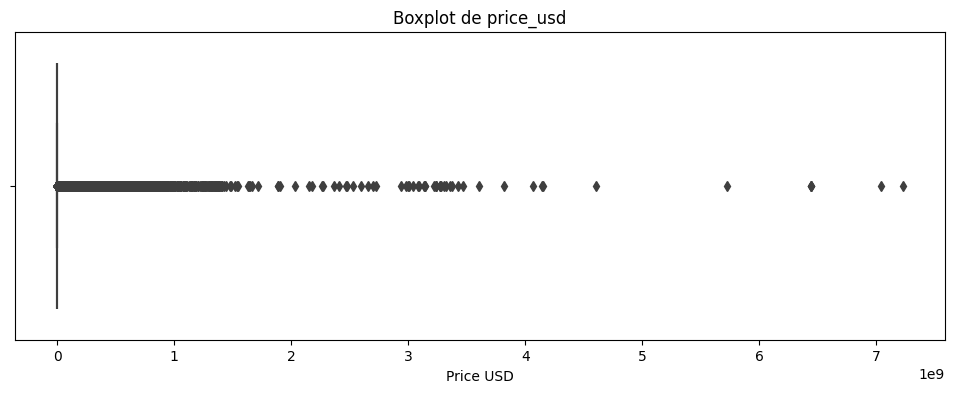

In [149]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['price_usd'])
plt.title('Boxplot de price_usd')
plt.xlabel('Price USD')
plt.show()

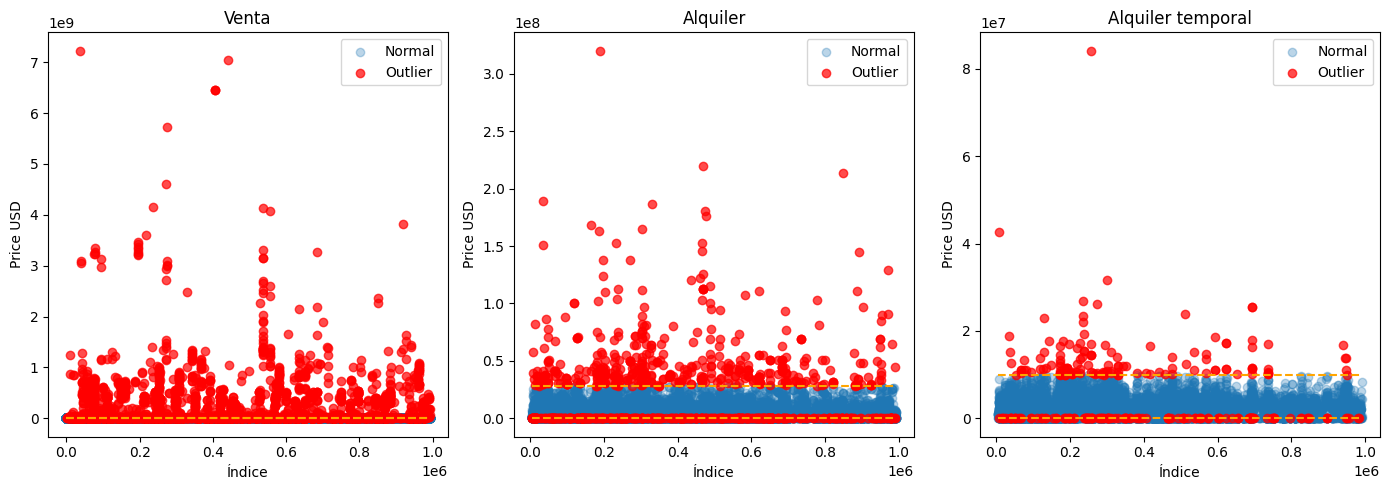

In [155]:
fig, axes = plt.subplots(1, len(categories), figsize=(14,5), sharey=False)  # sharey=False

for ax, cat in zip(axes, categories):
    sub_df = df[df['operation_type'] == cat]
    Q1 = sub_df['price_usd'].quantile(0.25)
    Q3 = sub_df['price_usd'].quantile(0.75)
    IQR = Q3 - Q1
    # lower = Q1 - 1.5 * IQR
    # upper = Q3 + 1.5 * IQR
    lower = sub_df['price_usd'].quantile(0.01)
    upper = sub_df['price_usd'].quantile(0.99)
    
    outliers = sub_df[(sub_df['price_usd'] < lower) | (sub_df['price_usd'] > upper)]
    normal = sub_df[(sub_df['price_usd'] >= lower) & (sub_df['price_usd'] <= upper)]
    
    ax.scatter(normal.index, normal['price_usd'], alpha=0.3, label='Normal')
    ax.scatter(outliers.index, outliers['price_usd'], alpha=0.7, color='red', label='Outlier')
    ax.hlines([lower, upper], xmin=sub_df.index.min(), xmax=sub_df.index.max(), colors='orange', linestyles='dashed')
    
    ax.set_title(cat)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Price USD')
    ax.legend()

plt.tight_layout()
plt.show()


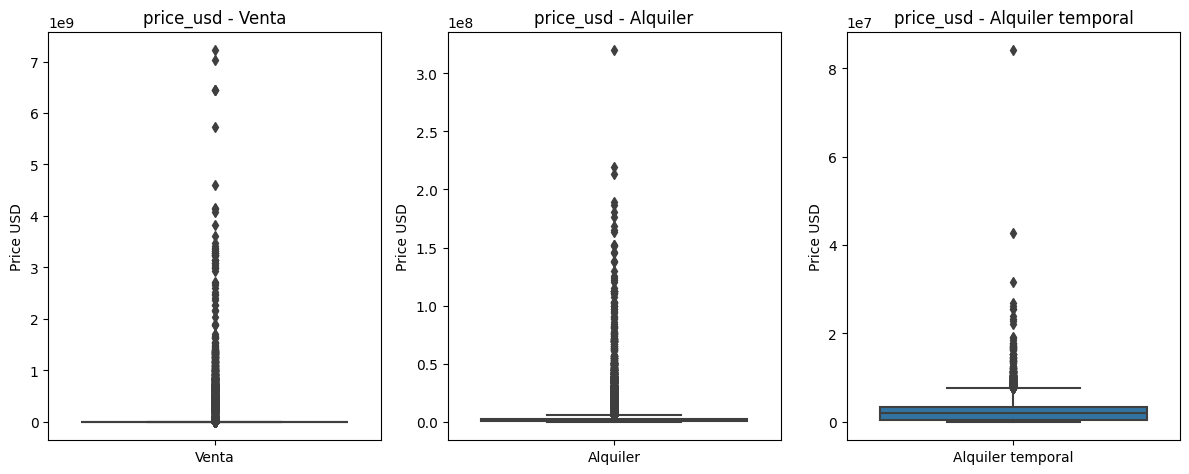

In [153]:
categories = df['operation_type'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(12,5), sharey=False)  # sharey=False permite escalas independientes

for ax, cat in zip(axes, categories):
    sns.boxplot(x='operation_type', y='price_usd', data=df[df['operation_type']==cat], ax=ax)
    ax.set_title(f'price_usd - {cat}')
    ax.set_xlabel('')
    ax.set_ylabel('Price USD')

plt.tight_layout()
plt.show()

## 4. Guardado de pickles y data procesada

### 4.1 Las columnas de OHE

In [127]:
import pickle

#si /models no existe, lo creo
import os   
if not os.path.exists('models'):
    os.makedirs('models')

with open('models/categories_ohe.pickle', 'wb') as handle:
    pickle.dump(df.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.2 Los bins

In [128]:
with open('models/bins_surface_covered_cat.pickle', 'wb') as handle:
    pickle.dump(bins_surface_covered_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_surface_total_cat.pickle', 'wb') as handle:
    pickle.dump(bins_surface_total_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_bathrooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_bathrooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_rooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_rooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_lat_cat.pickle', 'wb') as handle:
    pickle.dump(bins_lat_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/bins_lon_cat.pickle', 'wb') as handle:
    pickle.dump(bins_lon_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.3 Dataset procesado

In [129]:
#si /data no existe, lo creo
import os   
if not os.path.exists('data'):
    os.makedirs('data')

df.to_csv('../data/data_processed.csv', index=False)
